In [1]:
import pandas as pd
import numpy as np
import plotnine as p9
import re
data = pd.read_csv('techscene.csv')

# Data cleaning

## Normalizing job titles

In order to make cleaning and analysis easier, we replace all uppercase letters in the data with lowercase. We also remove some instances of superfluous information from job titles, such as strings like "(m/f/d)" or "SEB | Tallinn".

In [2]:
for column in data.columns:#teeme kõik väiketähtedeks
  data[column]=data[column].str.lower()
#job_name
#remove (m/f/d),(m/f/x),| SEB, Tallinn,
data['job_name']=data['job_name'].str.replace('(m/f/d)', '').replace('(m/f/x)','').replace('| SEB, Tallinn','').replace('\"','')

Some of the data from the beginning of the scraping period doesn't include the field `domain`; the value of this field for these listings is `nan`. We can retroactively add these based on the title of the listing.

In [3]:
data[data['domain'].isna()]

,company_name,job_name,job_link,date_added,domain
0,spectrocoin,front-end software engineer,https://careers.spectrocoin.com/position.html?...,2024-03-26 00:00:00,NaN
1,spectrocoin,react native developer,https://careers.spectrocoin.com/position.html?...,2024-03-26 00:00:00,NaN
2,novater solutions,front-end developer,https://novater.com/careers/front-end-developer/,2024-03-26 00:00:00,NaN
3,lhv,front-end-vanemarendaja,https://boards.greenhouse.io/lhv/jobs/7257214002,2024-03-26 00:00:00,NaN
4,qminder,front-end developer,https://apply.workable.com/j/3a16ed0568,2024-03-26 00:00:00,NaN
...,...,...,...,...,...
737,luminor,senior compliance officer (assurance unit),https://luminorbank.teamtailor.com/jobs/354120...,2024-04-02 00:00:00,NaN
738,cybernetica,post-quantum cryptography engineer,https://cyber.teamdash.com/p/job/iqn79wzx/post...,2024-04-02 00:00:00,NaN
739,cybernetica,researcher,https://cyber.teamdash.com/p/job/pagseczx/rese...,2024-04-02 00:00:00,NaN
740,cybernetica,data architect,https://cyber.teamdash.com/p/job/knvredgr/data...,2024-04-02 00:00:00,NaN


In [4]:
data['domain'].unique()

array([nan, 'analytics', 'front-end', 'back-end', 'full-stack', 'mobile',
       'software-development', 'other', 'devops-sre', 'data-science',
       'cyber-security', 'ai-ml', 'qa', 'sales', 'finance', 'marketing',
       'design', 'hr', 'customer-support', 'management'], dtype=object)

In [5]:
replacement_dict={#regex: domain,
  'software engineer|tarkvaraarendaja|systems engineer|test automation engineer|scala engineer|platform engineer|software support engineer': 'software-development',
  'front-end|frontend|react': 'front-end',
  'back-end|backend': 'back-end',
  'android|ios': 'mobile',
  'devops': 'devops-sre',
  'data scientist|data engineer': 'data-science',
  'full-stack|full stack': 'full-stack',
  'qa engineer|quality engineer':'qa',
  'analyst|monitooringu spetsialist':'analytics',
  'people operations':'hr',
  'content developer|branding|brand manager':'marketing',
  'product owner|compliance officer|projektijuht|team lead|project lead':'management',
  'manager, debt capital markets|business analyst|business intelligence|aml|financial|risk|kindlustus|ärianalüüs|finance developer': 'finance',
  'cyber security|cryptography engineer|soc analyst|küberturvalisus|secops|protection|surveillance': 'cyber-security',
  'ai engineer|machine learning': 'ai-ml',
  'client specialist|sales manager|account manager|account management': 'sales',
  'support engineer|support associate|tugiteenus|helpdesk': 'customer-support'
  }
for index, row in data[data['domain'].isna()].iterrows():#iterate through all listings that have the 'domain' column as 'nan'
  matched=False
  for regex in replacement_dict.keys():
    if not matched and re.search(regex,row['job_name']):#check if any of the regexes in the dictionary match the name of the listing, if they do, add a domain from replacement_dict
      matched=True
      data.loc[index,'domain']=replacement_dict[regex]
      #print(row['job_name']+': changed domain to '+replacement_dict[regex])#debugging
  if not matched:#debugging
    print(row['job_name']+' not matched')

javascript developer (mid/senior level) not matched
junior developer not matched
qt developer not matched
senior code module (java) engineer: discover the inner workings of java! not matched
senior code module (c++) engineer for our python agent team not matched
senior python engineer not matched
staff python engineer not matched
business developer (brazilian/latam projects) for data exchange technologies not matched
blockchain developer not matched
java developer in savings & investment tribe not matched
java software developer in api gateway team not matched
java software developer in card acquiring team at cards and payments tribe not matched
data warehouse developer not matched
.net developer (ecommerce) not matched
blockchain developer not matched
elixir developer not matched
servicenow developers - tietoevry tech services not matched
senior server engineer not matched
deployment engineer not matched
senior site reliability engineer not matched
network system engineer  not matched

In [6]:
data[data['domain'].isna()]

,company_name,job_name,job_link,date_added,domain
57,nexd,javascript developer (mid/senior level),https://www.nexd.com/career/javascript-develop...,2024-03-26 00:00:00,NaN
60,relax gaming,junior developer,https://relaxgaming.bamboohr.com/careers/300,2024-03-26 00:00:00,NaN
62,interactive brokers,qt developer,https://boards.greenhouse.io/ibkr/jobs/6727389002,2024-03-26 00:00:00,NaN
63,dynatrace,senior code module (java) engineer: discover t...,https://jobs.smartrecruiters.com/dynatrace1/74...,2024-03-26 00:00:00,NaN
64,dynatrace,senior code module (c++) engineer for our pyth...,https://jobs.smartrecruiters.com/dynatrace1/74...,2024-03-26 00:00:00,NaN
...,...,...,...,...,...
734,luminor,summer internship in banking back-office,https://luminorbank.teamtailor.com/jobs/368912...,2024-04-02 00:00:00,NaN
735,luminor,internal auditor,https://luminorbank.teamtailor.com/jobs/372078...,2024-04-02 00:00:00,NaN
736,luminor,it auditor,https://luminorbank.teamtailor.com/jobs/372038...,2024-04-02 00:00:00,NaN
739,cybernetica,researcher,https://cyber.teamdash.com/p/job/pagseczx/rese...,2024-04-02 00:00:00,NaN


## Compressing consecutive listings

Currently, our data contains every instance of a listing scraped in a day. For purposes of analysis, it might be helpful to compress the data so that consecutive appearances of one listing get turned into one single entry, with new fields `first_appeared` and `last_appeared`.

In [7]:
"""
Groups data by company name, job name, and job link. 
Sorts the data by date added and creates blocks of consecutive job postings.
"""
#might not work
def get_consecutive_blocks(data):

    data['date_added'] = pd.to_datetime(data['date_added']).dt.date

    # Normalize text for comparison
    data['job_name'] = data['job_name'].str.lower()
    data['company_name'] = data['company_name'].str.lower()

    # Remove exact duplicates
    data = data.drop_duplicates()

    # Create an empty DataFrame with specified columns
    new_data = pd.DataFrame(columns=["company_name", "job_name", "domain", "first_appeared", "last_appeared", "job_link"])

    grouped = data.groupby(["company_name", "job_name", "job_link"])
    
    for (company_name, job_name, job_link), group in grouped:
        group = group.sort_values('date_added')

        start_date = None
        prev_date = None

        # Get domain if exists in the group
        domain = group['domain'].dropna().iloc[0] if not group['domain'].dropna().empty else None

        for current_date in group['date_added']:
            if start_date is None:
                start_date = current_date
                prev_date = current_date
            elif (current_date - prev_date).days > 1:
                # Special case: check only for 2024-09-06
                if (prev_date == pd.to_datetime('2024-09-05').date() and 
                    current_date == pd.to_datetime('2024-09-07').date()):
                    prev_date = current_date  # Assume continuity
                else:
                    # Save current block if gap is not special case
                    new_data = pd.concat([new_data, pd.DataFrame({
                        "company_name": [company_name],
                        "job_name": [job_name],
                        "domain": [domain],
                        "first_appeared": [start_date],
                        "last_appeared": [prev_date],
                        "job_link": [job_link]
                    })], ignore_index=True)
                    start_date = current_date

                start_date = current_date  # Start a new block

            prev_date = current_date

        # Save the last block
        new_data = pd.concat([new_data, pd.DataFrame({
            "company_name": [company_name],
            "job_name": [job_name],
            "domain": [domain],
            "first_appeared": [start_date],
            "last_appeared": [prev_date],
            "job_link": [job_link]
        })], ignore_index=True)

    return new_data

# Example usage:
# data = pd.read_csv('input.csv')
nd = data.copy()
processed_data = get_consecutive_blocks(data)
#processed_data.to_csv('new_data3442!!!.csv', index=False)


In [8]:
"""
Groups data by company name, job name, and job link.
Finds the first appearance and last appearance dates.
"""

def process_job_data(data):
    data['date_added'] = pd.to_datetime(data['date_added']).dt.date

    # Create an empty DataFrame with specified columns
    new_data = pd.DataFrame(columns=["company_name", "job_name", "domain", "first_appeared", "last_appeared", "job_link"])
    
    # Group by unique identifying columns
    grouped = data.groupby(["company_name", "job_name", "job_link"])
    
    # Iterate through each unique group
    for (company_name, job_name, job_link), group in grouped:
        # Find the first and last appearance dates
        first_appeared = group['date_added'].min()
        last_appeared = group['date_added'].max()
        

        # Get domain if exists in the group
        domain = group['domain'].dropna().iloc[0] if not group['domain'].dropna().empty else None

        # Create a new row for this unique entry
        new_row = pd.DataFrame({
            "company_name": [company_name],
            "job_name": [job_name],
            "domain": [domain],
            "first_appeared": [first_appeared],
            "last_appeared": [last_appeared],
            "job_link": [job_link]
        })
        
        # Append to new_data
        new_data = pd.concat([new_data, new_row], ignore_index=True)
    
    return new_data

# Example usage
# data = pd.read_csv('your_input_file.csv')  # Load your input data
nd = data.copy()
new_data = process_job_data(data)
#new_data.to_csv('new_data3442!!!.csv', index=False)  # Save processed data

In [9]:
"""
Checks if first data has the same links as second data.
"""
def check_links(data, data2):

    links1 = data["job_link"].unique()
    links2 = data2["job_link"].unique()
    for link in links1:
        if link not in links2:
            print(link)

In [10]:
levels_df = new_data.copy()

level_replacement_dict={#regex: domain,
  r'lead': 'lead',
  r'senior|vanem arendaja': 'senior',
  r'intern': 'intern',
  r'junior': 'junior',
  r'head': 'head',
  r'director': 'director'
}
levels_df['level'] = None
for index, row in levels_df[levels_df['level'].isna()].iterrows():#iterate through all listings that have the 'domain' column as 'nan'
  matched=False
  for regex in level_replacement_dict.keys():
    if not matched and re.search(regex,row['job_name']):#check if any of the regexes in the dictionary match the name of the listing, if they do, add a domain from replacement_dict
      matched=True
      levels_df.loc[index,'level']=level_replacement_dict[regex]
  #    print(row['job_name']+': changed domain to '+level_replacement_dict[regex])#debugging
  if not matched:#debugging
    levels_df.loc[index,'level']='mid/unknown'
  #  print(row['job_name']+' not matched')
#df[new_data['level'].isna()]

#df[new_data['level'].notna()]
levels_df[levels_df['level'] == 'director']

,company_name,job_name,domain,first_appeared,last_appeared,job_link,level
153,bolt,"director of product, commerce",management,2024-06-25,2024-09-19,https://careers.bolt.eu/positions/7441591002,director
271,bolt,"regional director, bolt food",management,2024-09-20,2024-11-10,https://careers.bolt.eu/positions/7607177002,director
562,coolbet,director of sports,management,2024-05-17,2024-06-03,https://careers.coolbet.ee/jobs/4500416-direct...,director
563,coolbet,"director, accounting",finance,2024-11-04,2024-11-10,https://careers.coolbet.ee/jobs/5153313-direct...,director
694,foxway,sales director,sales,2024-04-11,2024-07-11,https://jobs.foxway.com/jobs/3819271-sales-dir...,director
788,katana,"director of product marketing, eu",None,2024-03-26,2024-03-26,https://careers.katanamrp.com/jobs/3669087-dir...,director
1424,skeleton technologies,director of communications (m/f/x),management,2024-11-01,2024-11-10,https://apply.workable.com/j/229b859ef7,director
1485,starship,customer success director,management,2024-08-21,2024-09-08,https://starship.teamtailor.com/jobs/4831478-c...,director
1610,veriff,director of engineering,management,2024-04-27,2024-06-06,https://www.veriff.com/careers/position/733016...,director
1611,veriff,director of engineering,management,2024-08-13,2024-11-06,https://www.veriff.com/careers/position/759396...,director


# Analyzing listings by time

## Patterns of posting new listings


## Identify listings that have been up for a long time
There are several listings that seem to have been up for hundreds of days.


In [11]:
df = new_data.copy()

df['length'] = df['last_appeared'] - df['first_appeared'] + pd.Timedelta(days=1)
df['length']=df['length'].apply(lambda x : x.days)#convert timedelta to int
df.sort_values("length", inplace=True, ascending=False)

df

,company_name,job_name,domain,first_appeared,last_appeared,job_link,length
410,bolt,"senior qa engineer, mobile",qa,2024-03-26,2024-11-10,https://careers.bolt.eu/positions/5185712002,230
560,coolbet,data warehouse developer,software-development,2024-03-26,2024-11-10,https://careers.coolbet.ee/jobs/1892917-data-w...,230
41,betsson group,engagement - backend software engineer,software-development,2024-03-26,2024-11-10,https://www.betssongroup.com/job/engagement-ba...,230
337,bolt,"senior data engineer, data platform - ingestion",data-science,2024-03-26,2024-11-10,https://careers.bolt.eu/positions/6846009002,230
934,lightyear,mobile software engineer – flutter,software-development,2024-03-26,2024-11-10,https://careers.lightyear.com/jobs/3091930-mob...,230
...,...,...,...,...,...,...,...
2045,yolo group,fraud & payments agent (day shifts),other,2024-06-11,2024-06-11,https://careers.yolo.com/jobs/4085713-fraud-pa...,1
448,bolt,"senior strategy analyst, growth strategy and g...",analytics,2024-04-19,2024-04-19,https://careers.bolt.eu/positions/7333884002,1
447,bolt,"senior software engineer, data platform - insi...",software-development,2024-03-26,2024-03-26,https://careers.bolt.eu/positions/7087991002,1
2099,yolo group,qa engineer,qa,2024-08-26,2024-08-26,https://careers.yolo.com/jobs/4895356-qa-engineer,1


In [13]:
print(f'Average time of listing: {round(df['length'].mean())} days')
print(f'Longest time: {df[df['length']==df['length'].max()]}')

Average time of listing: 42 days
Longest time:            company_name                                           job_name  \
410                bolt                         senior qa engineer, mobile   
560             coolbet                           data warehouse developer   
41        betsson group             engagement - backend software engineer   
337                bolt    senior data engineer, data platform - ingestion   
934           lightyear                 mobile software engineer – flutter   
345                bolt         senior data scientist, investment modeling   
920           lightyear                   backend software engineer – java   
1147  novater solutions                               full-stack developer   
669              evitec                                   open application   
1146  novater solutions                                front-end developer   
1149  novater solutions                                          team lead   
1148  novater sol

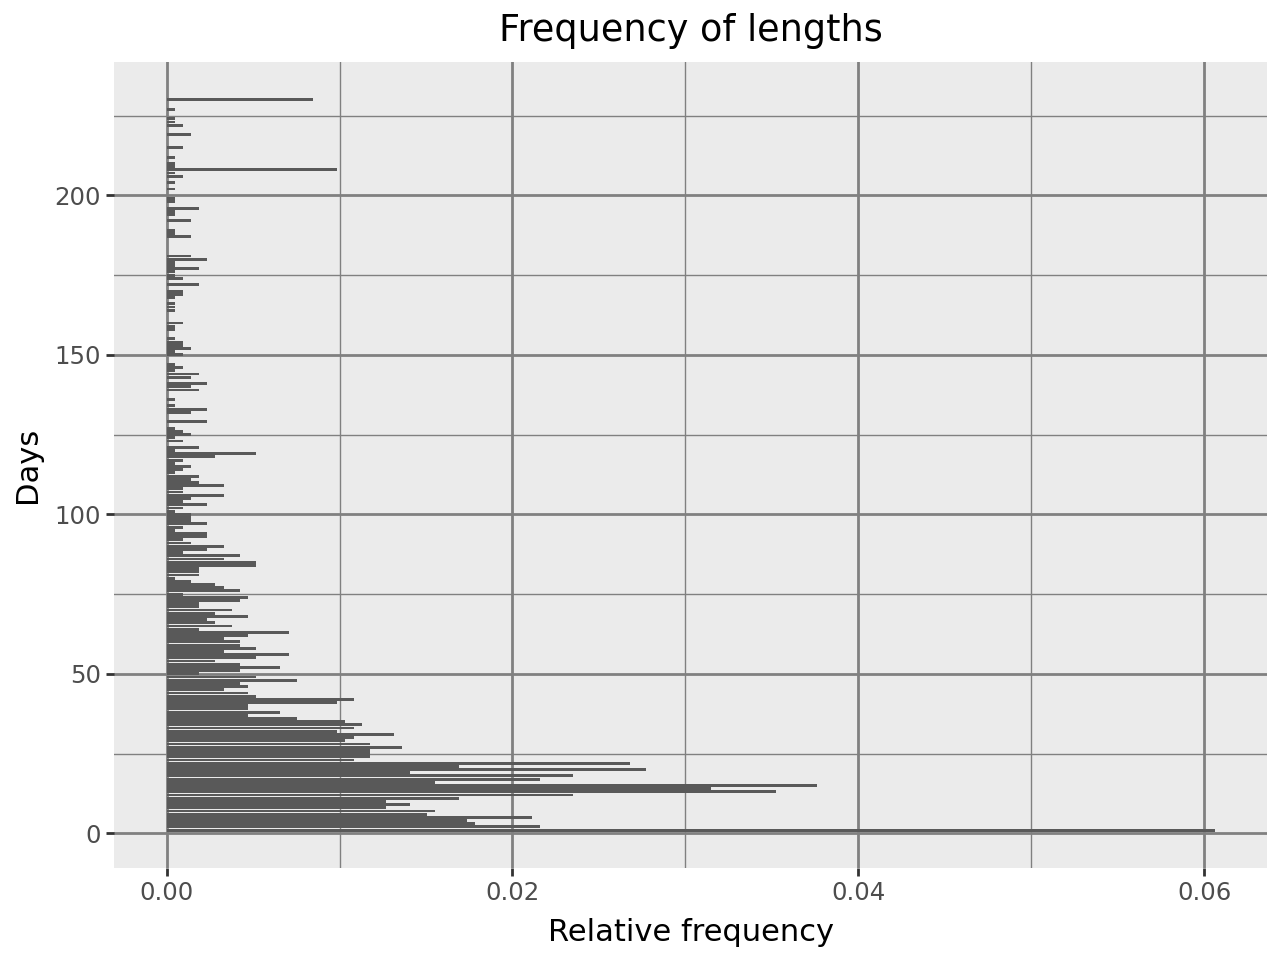

In [121]:
( p9.ggplot(
    data=df,
    mapping=p9.aes(x='length',y=p9.after_stat('count / np.sum(count)'))
)
+ p9.geom_bar()
+ p9.labs(x='Days',y='Relative frequency')
+ p9.coord_flip()
+ p9.ggtitle("Frequency of lengths")
+ p9.theme(
    #panel_background=p9.element_blank(),
    plot_background=p9.element_blank(),
    panel_grid_major=p9.element_line(color="gray"),
    panel_grid_minor=p9.element_line(color="gray")
    )
)

### What is the most popular weekday for posting new listings?

In [16]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['weekday_added']=data['date_added'].dt.day_name()
data

,company_name,job_name,job_link,date_added,domain,weekday_added
0,spectrocoin,front-end software engineer,https://careers.spectrocoin.com/position.html?...,2024-03-26,software-development,Tuesday
1,spectrocoin,react native developer,https://careers.spectrocoin.com/position.html?...,2024-03-26,front-end,Tuesday
2,novater solutions,front-end developer,https://novater.com/careers/front-end-developer/,2024-03-26,front-end,Tuesday
3,lhv,front-end-vanemarendaja,https://boards.greenhouse.io/lhv/jobs/7257214002,2024-03-26,front-end,Tuesday
4,qminder,front-end developer,https://apply.workable.com/j/3a16ed0568,2024-03-26,front-end,Tuesday
...,...,...,...,...,...,...
85698,luminor,data oversight risk officer,https://luminorbank.teamtailor.com/jobs/515065...,2024-11-10,other,Sunday
85699,luminor,senior anti-fraud compliance officer,https://luminorbank.teamtailor.com/jobs/515777...,2024-11-10,other,Sunday
85700,luminor,kõnekeskuse kliendinõustaja,https://luminorbank.teamtailor.com/jobs/475659...,2024-11-10,other,Sunday
85701,evitec,open application,https://careers.evitec.com/jobs/1367354-open-a...,2024-11-10,other,Sunday


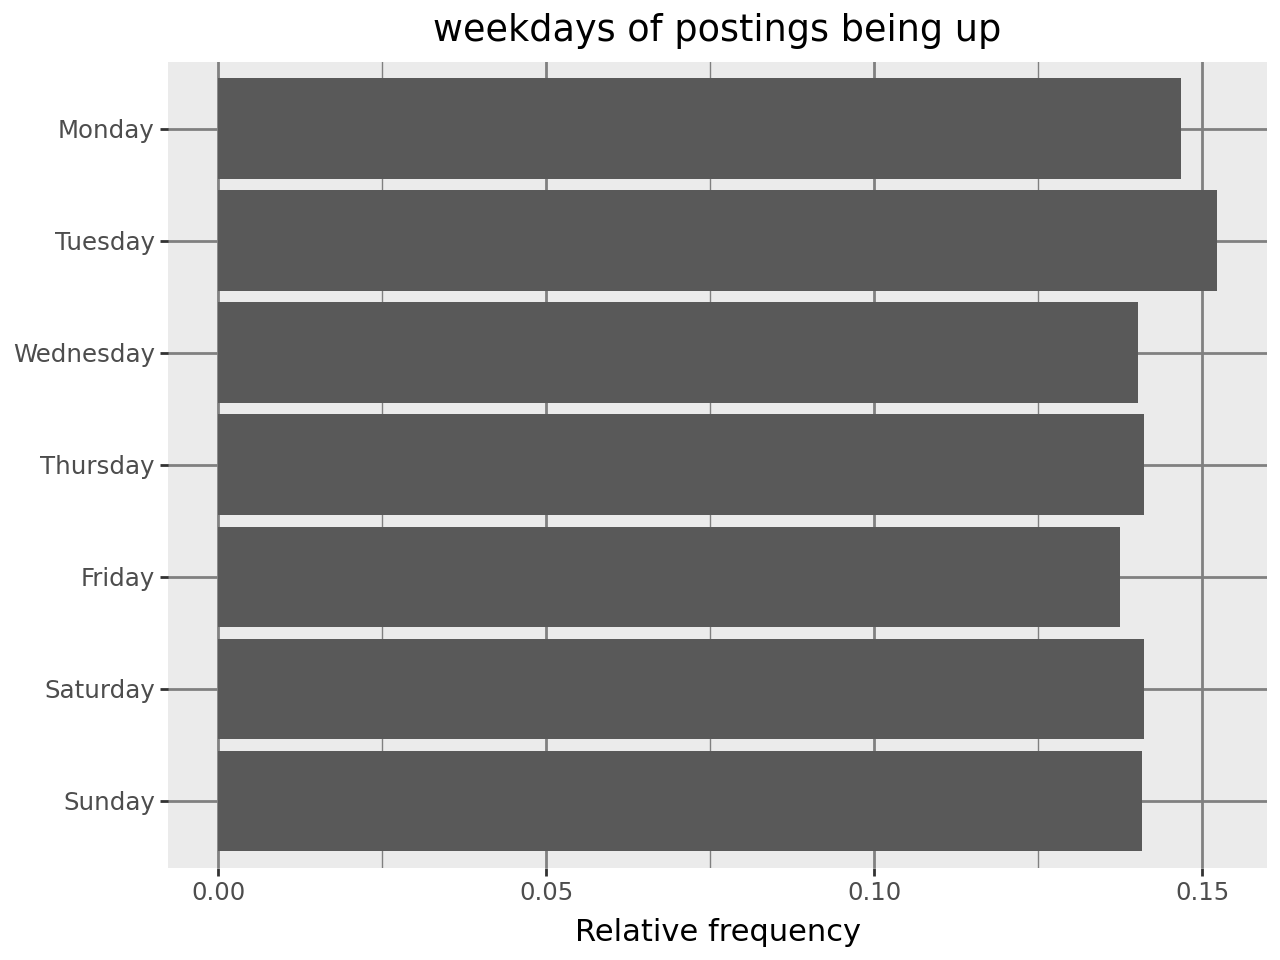

In [120]:
weekdays_sorted=['Sunday','Saturday','Friday','Thursday','Wednesday','Tuesday','Monday']
weekday_cat=pd.Categorical(data['weekday_added'], categories=weekdays_sorted)

( p9.ggplot(
    data=data,
    mapping=p9.aes(x='weekday_cat',y=p9.after_stat('count / np.sum(count)'))
)
+ p9.geom_bar()
+ p9.labs(x='',y='Relative frequency')
+ p9.coord_flip()
+ p9.ggtitle("weekdays of postings being up")
+ p9.theme(
    #panel_background=p9.element_blank(),
    plot_background=p9.element_blank(),
    panel_grid_major=p9.element_line(color="gray"),
    panel_grid_minor=p9.element_line(color="gray")
    )
)

In [17]:
new_data['first_appeared'] = pd.to_datetime(new_data['first_appeared'])
new_data['last_appeared'] = pd.to_datetime(new_data['last_appeared'])
new_data['weekday_first']=new_data['first_appeared'].dt.day_name()
new_data['weekday_last']=new_data['last_appeared'].dt.day_name()
new_data

,company_name,job_name,domain,first_appeared,last_appeared,job_link,weekday_first,weekday_last
0,adcash,devops intern,devops-sre,2024-03-26,2024-04-03,https://careers.adcash.com/jobs/3590778-devops...,Tuesday,Wednesday
1,adcash,devops intern,devops-sre,2024-06-04,2024-06-19,https://careers.adcash.com/jobs/4561598-devops...,Tuesday,Wednesday
2,adcash,digital marketing specialist,marketing,2024-07-04,2024-08-18,https://careers.adcash.com/jobs/4695248-digita...,Thursday,Sunday
3,adcash,documentation specialist,other,2024-04-16,2024-05-19,https://careers.adcash.com/jobs/3877122-docume...,Tuesday,Sunday
4,adcash,influencer marketing manager,marketing,2024-05-17,2024-07-14,https://careers.adcash.com/jobs/4475596-influe...,Friday,Sunday
...,...,...,...,...,...,...,...,...
2123,yolo group,tradeart operations specialist,other,2024-05-27,2024-06-10,https://careers.yolo.com/jobs/4525692-tradeart...,Monday,Monday
2124,yolo group,turkish sportsbet operations executive,other,2024-04-15,2024-04-22,https://careers.yolo.com/jobs/3780529-turkish-...,Monday,Monday
2125,yolo group,vip crm specialist,other,2024-07-03,2024-08-05,https://careers.yolo.com/jobs/4697192-vip-crm-...,Wednesday,Monday
2126,yolo group,vip host (japanese/arabic/hindi/english speaking),other,2024-03-26,2024-05-09,https://careers.yolo.com/jobs/3611277-vip-host...,Tuesday,Thursday


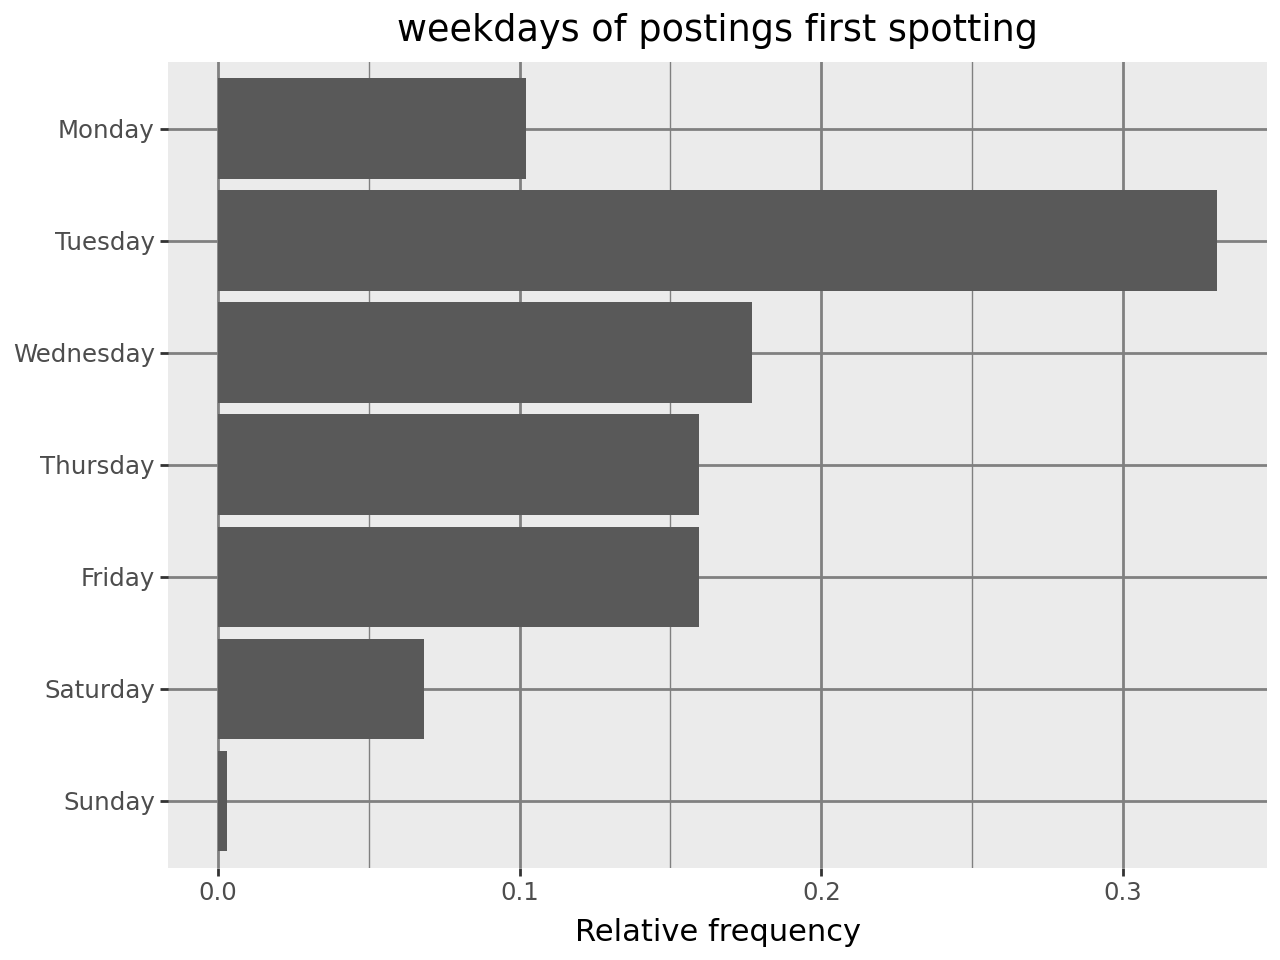

In [119]:
weekdays_sorted=['Sunday','Saturday','Friday','Thursday','Wednesday','Tuesday','Monday']
weekday_cat=pd.Categorical(new_data['weekday_first'], categories=weekdays_sorted)

( p9.ggplot(
    data=new_data,
    mapping=p9.aes(x='weekday_cat',y=p9.after_stat('count / np.sum(count)'))
)
+ p9.geom_bar()
+ p9.labs(x='',y='Relative frequency')
+ p9.coord_flip()
+ p9.ggtitle("weekdays of postings first spotting")
+ p9.theme(
    #panel_background=p9.element_blank(),
    plot_background=p9.element_blank(),
    panel_grid_major=p9.element_line(color="gray"),
    panel_grid_minor=p9.element_line(color="gray")
    )
)

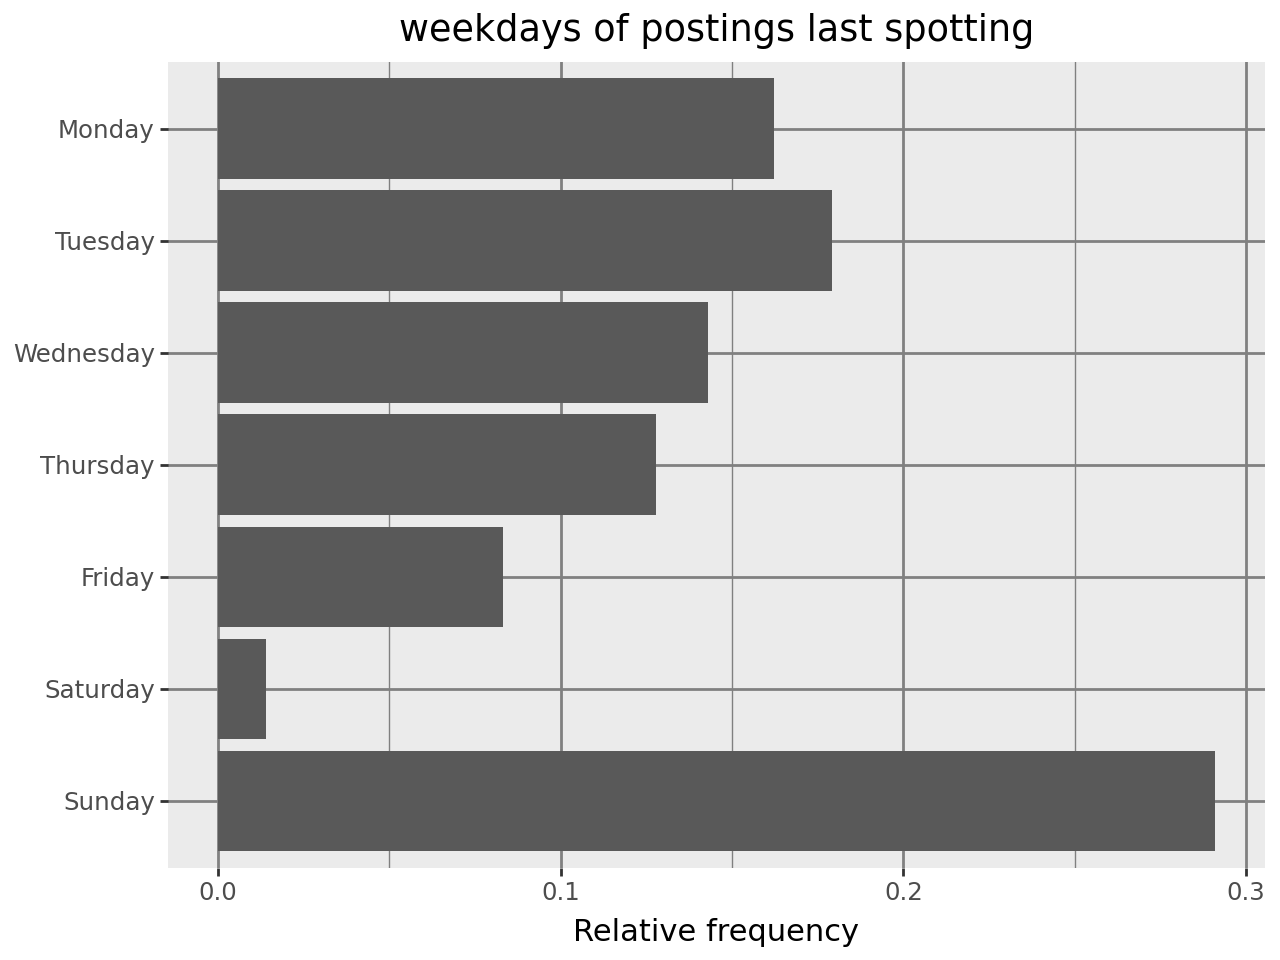

In [118]:
weekdays_sorted=['Sunday','Saturday','Friday','Thursday','Wednesday','Tuesday','Monday']
weekday_cat=pd.Categorical(new_data['weekday_last'], categories=weekdays_sorted)

( p9.ggplot(
    data=new_data,
    mapping=p9.aes(x='weekday_cat',y=p9.after_stat('count / np.sum(count)'))
)
+ p9.geom_bar()
+ p9.labs(x='',y='Relative frequency')
+ p9.coord_flip()
+ p9.ggtitle("weekdays of postings last spotting")
+ p9.theme(
    #panel_background=p9.element_blank(),
    plot_background=p9.element_blank(),
    panel_grid_major=p9.element_line(color="gray"),
    panel_grid_minor=p9.element_line(color="gray")
    )
)

## Identify listings that get posted repeatedly
A listing being posted repeatedly (not being scraped for a while and then reappearing) could imply that a new hire has failed the probationary period and a new hire is needed.

In [19]:
data_repeated=new_data
processed_data_grouped=data_repeated.groupby('job_link')

Here we highlight repeating listings and classify them with the column `repeats`, which is `True` if the listing is found to repeat and `False` if not.

In [20]:
for name, group in processed_data_grouped:
  if len(group)>1:
    print(name)
    print(str(len(group))+' appearances')
    print(group)

data_repeated['repeats']=data_repeated['job_link'].duplicated()

https://apply.workable.com/j/9c81ddebd2
3 appearances
    company_name                     job_name      domain first_appeared  \
601   creditstar         full stack developer  full-stack     2024-03-26   
605   creditstar  senior full stack developer  full-stack     2024-05-07   
606   creditstar   senior full stack engineer  full-stack     2024-07-16   

    last_appeared                                 job_link weekday_first  \
601    2024-05-05  https://apply.workable.com/j/9c81ddebd2       Tuesday   
605    2024-07-15  https://apply.workable.com/j/9c81ddebd2       Tuesday   
606    2024-11-10  https://apply.workable.com/j/9c81ddebd2       Tuesday   

    weekday_last  
601       Sunday  
605       Monday  
606       Sunday  
https://apply.workable.com/j/f9400180da
2 appearances
    company_name          job_name  domain first_appeared last_appeared  \
602   creditstar  product designer  design     2024-07-11    2024-09-10   
610   creditstar   visual designer  design     2024-06-1

# What domains are the most popular?

Sort by domain, report frequency

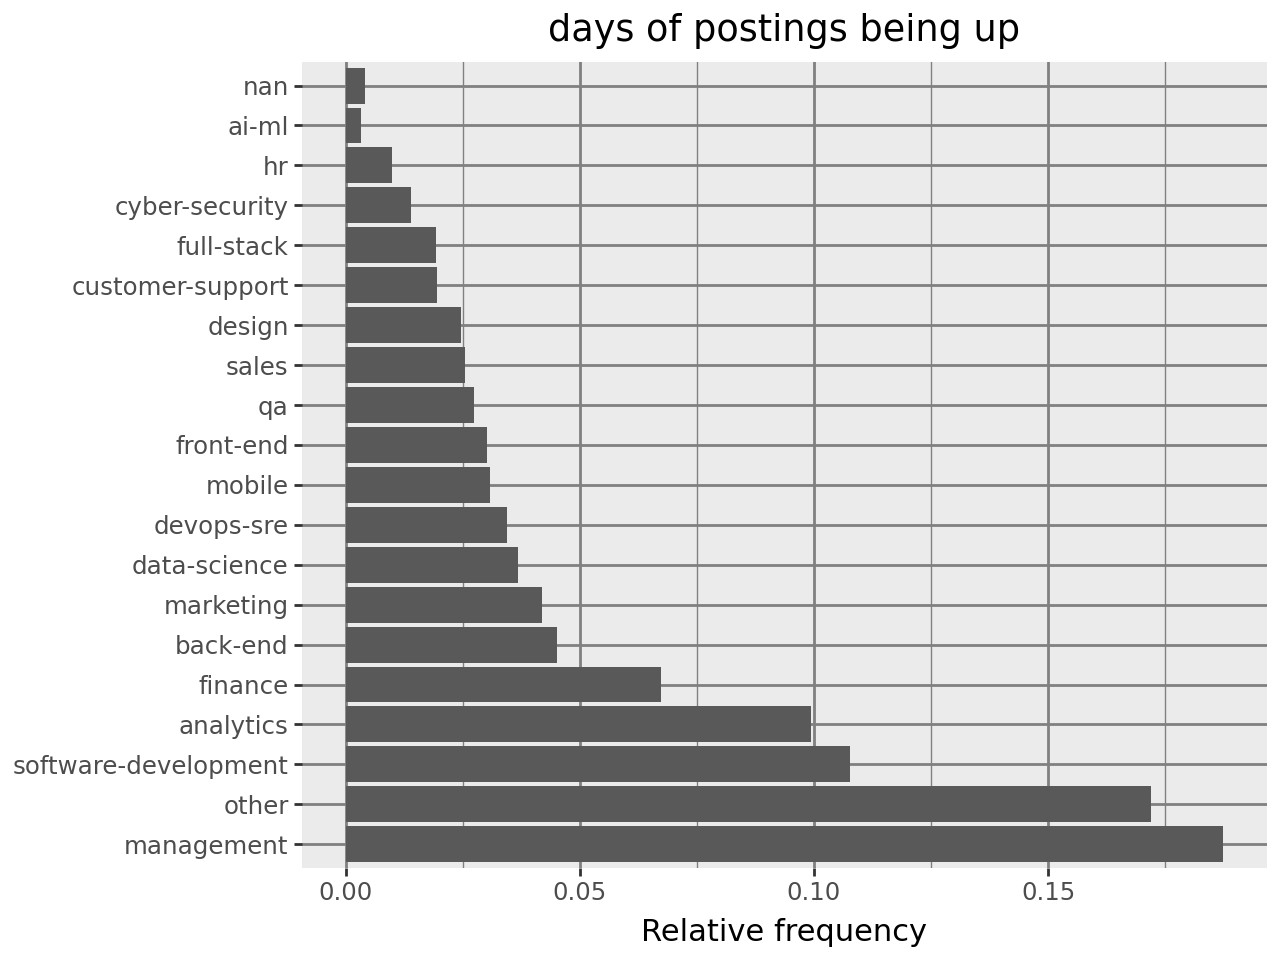

In [117]:
domains_sorted=data['domain'].value_counts().index.tolist()
domain_cat=pd.Categorical(data['domain'], categories=domains_sorted)

( p9.ggplot(
    data=data,
    mapping=p9.aes(x='domain_cat',y=p9.after_stat('count / np.sum(count)'))
)
+ p9.geom_bar()
+ p9.labs(x='',y='Relative frequency')
+ p9.coord_flip()
+ p9.ggtitle("days of postings being up")
+ p9.theme(
    #panel_background=p9.element_blank(),
    plot_background=p9.element_blank(),
    panel_grid_major=p9.element_line(color="gray"),
    panel_grid_minor=p9.element_line(color="gray")
    )
)

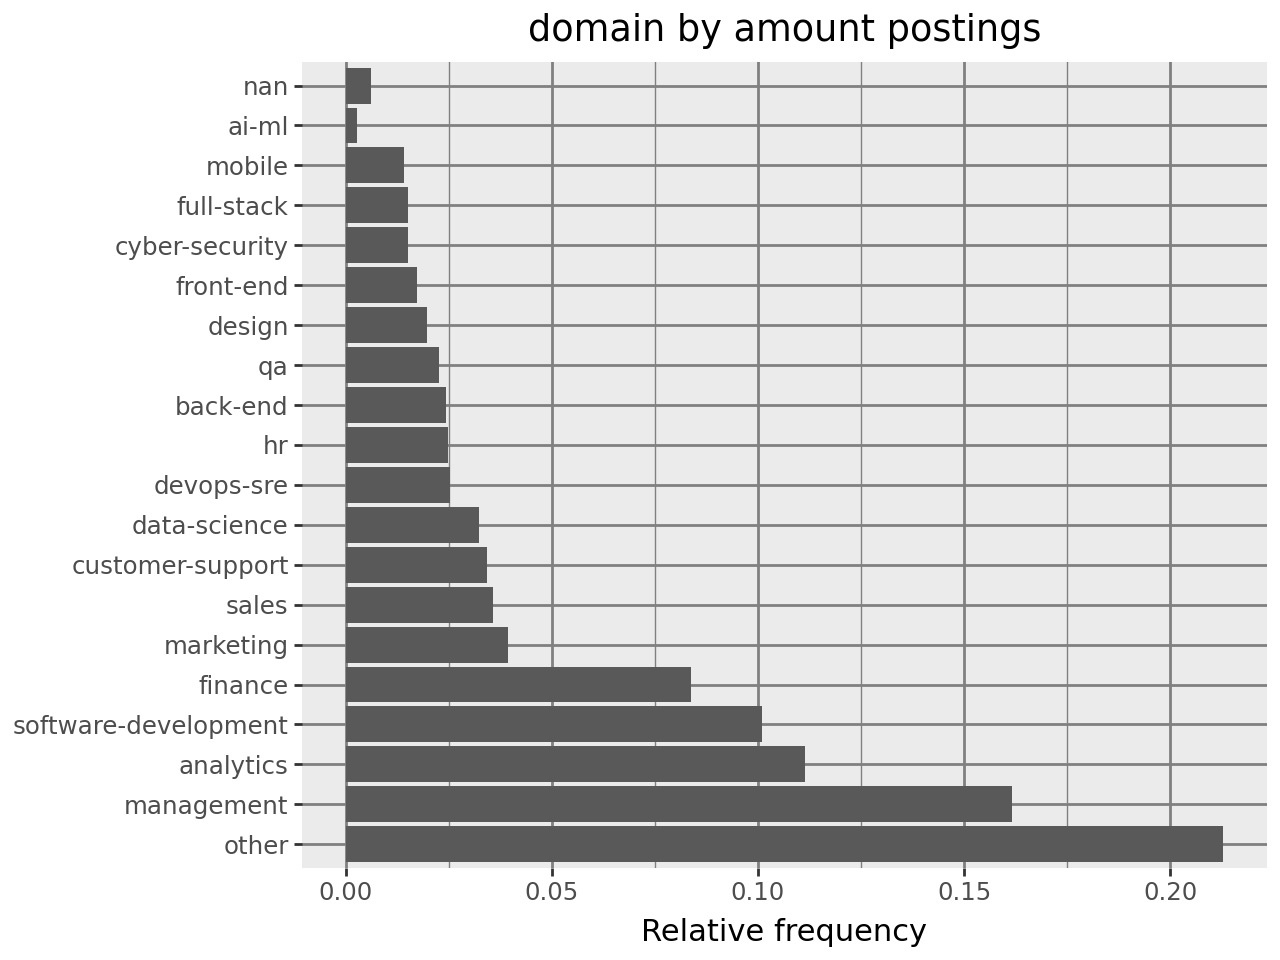

In [116]:
domains_sorted=new_data['domain'].value_counts().index.tolist()
domain_cat=pd.Categorical(new_data['domain'], categories=domains_sorted)

( p9.ggplot(
    data=new_data,
    mapping=p9.aes(x='domain_cat',y=p9.after_stat('count / np.sum(count)'))
)
+ p9.geom_bar()
+ p9.labs(x='',y='Relative frequency')
+ p9.coord_flip()
+ p9.ggtitle("domain by amount postings")
+ p9.theme(
    #panel_background=p9.element_blank(),
    plot_background=p9.element_blank(),
    panel_grid_major=p9.element_line(color="gray"),
    panel_grid_minor=p9.element_line(color="gray")
    )
)

In [13]:
domain_counts_daily=data.groupby(['date_added','domain'])['domain'].count()
domain_counts_daily=domain_counts_daily.reset_index(name='counts')
domain_counts_daily


,date_added,domain,counts
0,2024-03-26,ai-ml,2
1,2024-03-26,analytics,48
2,2024-03-26,back-end,9
3,2024-03-26,customer-support,3
4,2024-03-26,cyber-security,7
...,...,...,...
4207,2024-11-10,mobile,11
4208,2024-11-10,other,53
4209,2024-11-10,qa,6
4210,2024-11-10,sales,3


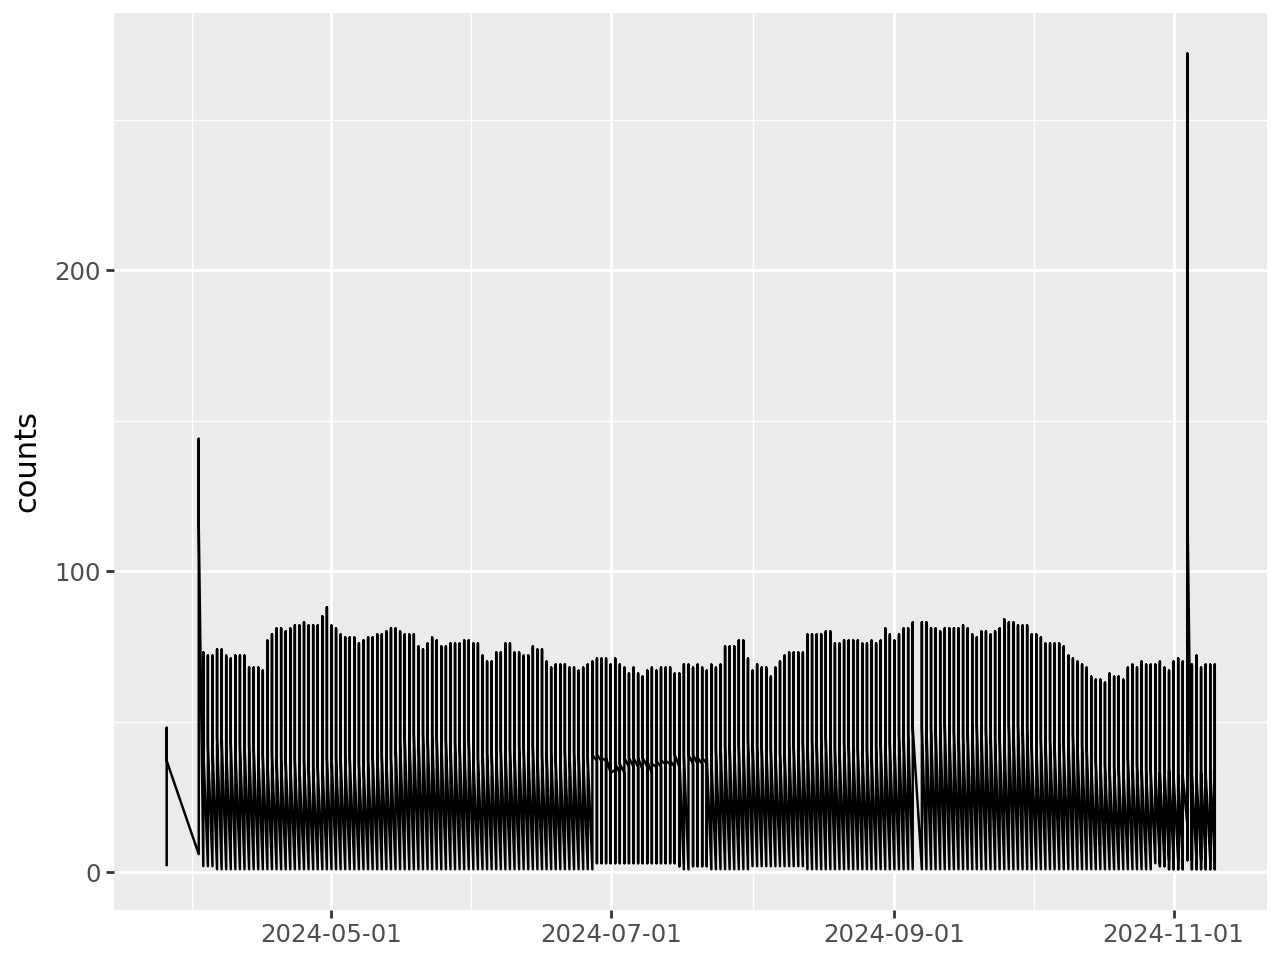

In [14]:
(p9.ggplot(
  data=domain_counts_daily,
  mapping=p9.aes(x='date_added',y='counts'))
+ p9.geom_line()
+ p9.labs(x='')#ticks by date
)

# What tech stacks are the most popular?
Sort by tech stack (if available), report frequency

# Who are the biggest hirerers?

In [15]:
new_data["company_name"].value_counts()

company_name
bolt             422
wise             304
luminor          153
seb              127
yolo group       117
                ... 
mercell            2
change invest      2
jobbatical         2
fortumo            2
boku               1
Name: count, Length: 73, dtype: int64

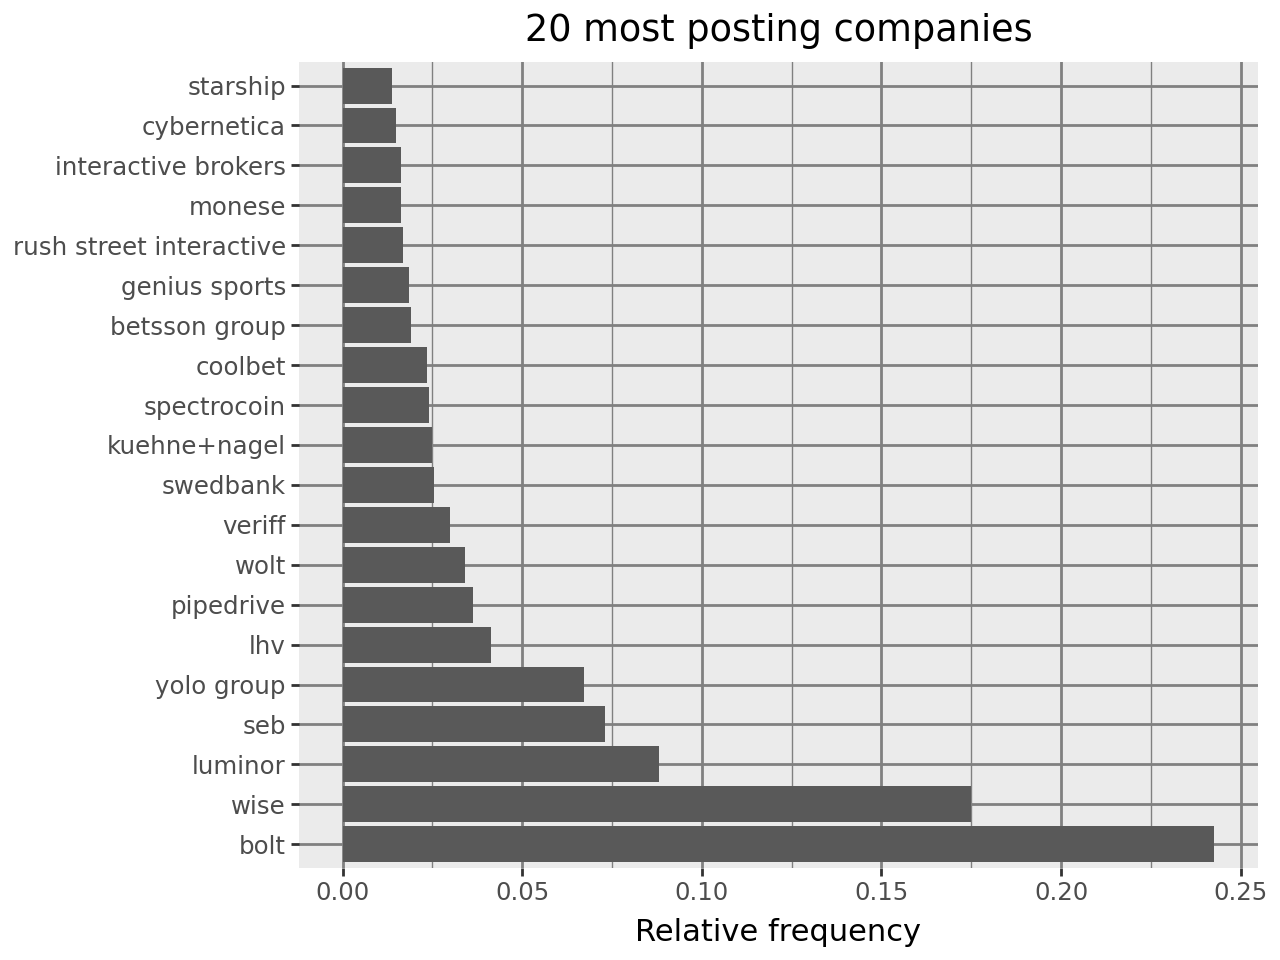

In [115]:
company_name_sorted=new_data['company_name'].value_counts().index.tolist()[:20]
new_data_top = new_data[new_data['company_name'].isin(company_name_sorted)]
domain_cat=pd.Categorical(new_data_top['company_name'], categories=company_name_sorted)

( p9.ggplot(
    data=new_data_top,
    mapping=p9.aes(x='domain_cat',y=p9.after_stat('count / np.sum(count)'))
)
+ p9.geom_bar()
+ p9.labs(x='',y='Relative frequency')
+ p9.coord_flip()
+ p9.ggtitle("20 most posting companies")
+ p9.theme(
    #panel_background=p9.element_blank(),
    plot_background=p9.element_blank(),
    panel_grid_major=p9.element_line(color="gray"),
    panel_grid_minor=p9.element_line(color="gray")
    )
)


# Analisyng listings by level

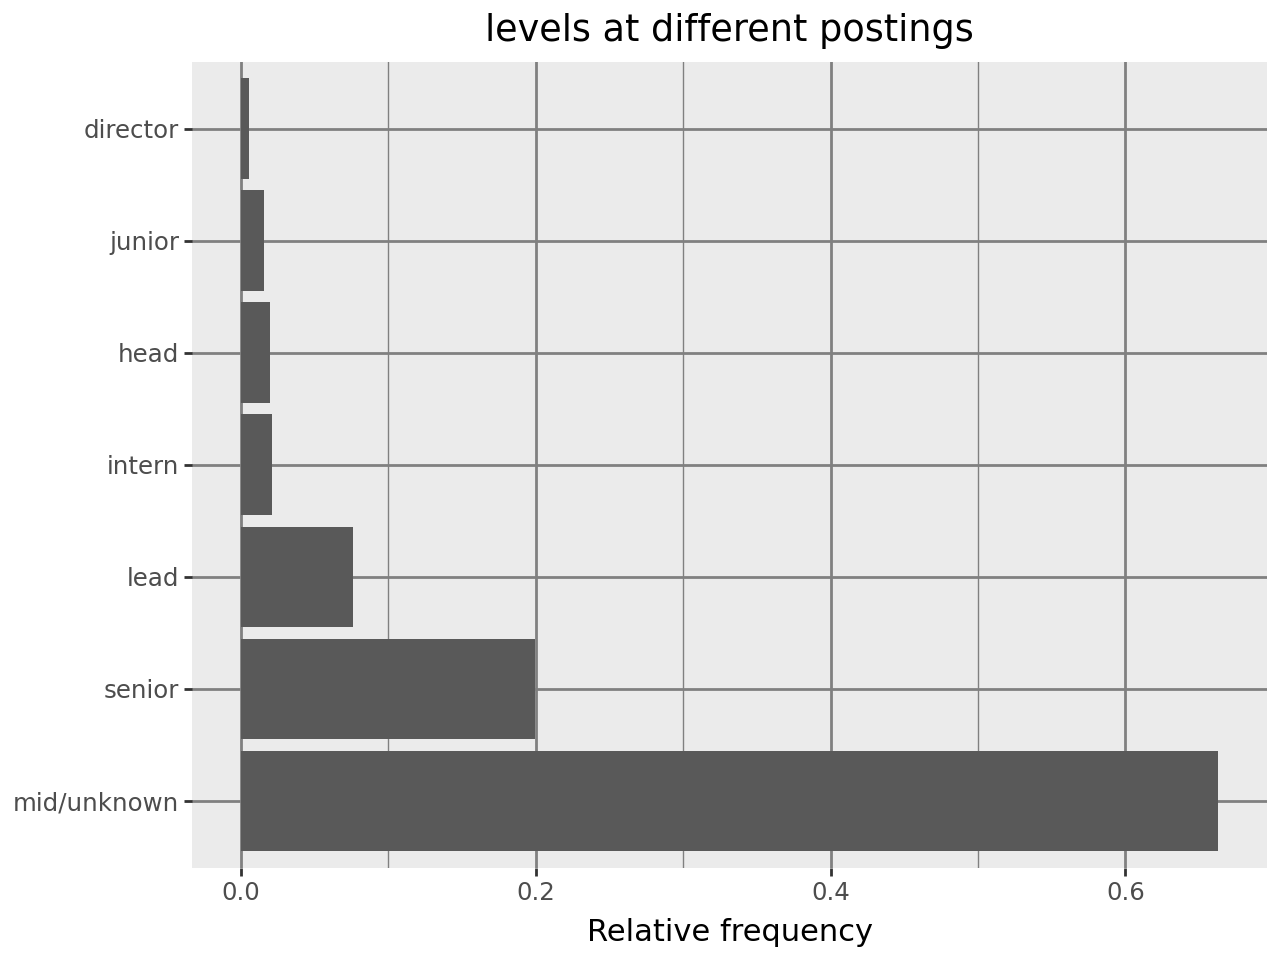

In [ ]:
levels_sorted=levels_df['level'].value_counts().index.tolist()
levels_cat=pd.Categorical(levels_df['level'], categories=levels_sorted)

( p9.ggplot(
    data=new_data,
    mapping=p9.aes(x='levels_cat',y=p9.after_stat('count / np.sum(count)'))
)
+ p9.geom_bar()
+ p9.labs(x='',y='Relative frequency')
+ p9.coord_flip()
+ p9.ggtitle("levels at different postings")
+ p9.theme(
    #panel_background=p9.element_blank(),
    plot_background=p9.element_blank(),
    panel_grid_major=p9.element_line(color="gray"),
    panel_grid_minor=p9.element_line(color="gray")
    )
)

## What hiring websites are the most popular?

We can trim away parts of the URL to keep only the name of the website used for hiring. Results:

# Frequent pattern mining

In [22]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

data_repeated['repeats']=data_repeated['job_link'].duplicated()
#one-hot encoding
onehot_data_repeated = pd.get_dummies(data_repeated, columns = ['company_name', 'job_name', 'domain', 'weekday']).drop(columns=['first_appeared','last_appeared','job_link'],axis=1)
#mine association rules
freq_itemsets = apriori(onehot_data_repeated, min_support=5/len(onehot_data_repeated), use_colnames=True)
rules_df=association_rules(freq_itemsets,metric='confidence',min_threshold=0.5)

rules_df

/home/mina/python/miniconda3/envs/IDS/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
/home/mina/python/miniconda3/envs/IDS/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
/home/mina/python/miniconda3/envs/IDS/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
/home/mina/python/miniconda3/envs/IDS/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead


KeyError: "['weekday'] not in index"